__In this assignment we are asking for a multiclass classifier. The entire MNIST data set will be used for input data. For this assignment, you will develop a classifier that may be used to predict which of the 10 digits is being written.__ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# 1. 
__Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv).__ 

__Record the time it takes to fit the model and then evaluate the model on the test.csv data by submitting to Kaggle.com.__ 

__Provide your Kaggle.com score and user ID.__


In [2]:
df_train = pd.read_csv('/Users/kirabreeden/Desktop/Grad_School/Northwestern_MSDS/Sping_2020/MSDS_422/Homeworks/HW_5/digit_train.csv')

df_test = pd.read_csv('/Users/kirabreeden/Desktop/Grad_School/Northwestern_MSDS/Sping_2020/MSDS_422/Homeworks/HW_5/digit_test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df_train.shape

(42000, 785)

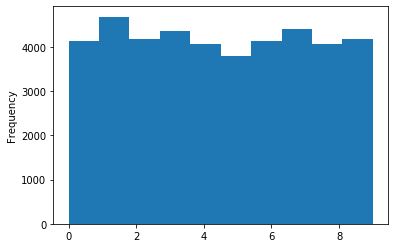

In [5]:
df_train['label'].plot.hist()

In [6]:
from sklearn.ensemble import RandomForestClassifier
#Here we will separate our x and our y values (features and labels)
X = np.array(df_train.drop(['label'], 1))
y = np.array(df_train['label'])

In [7]:
#cross validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

X_predict = np.array(df_test)

In [10]:
rnd_forest = RandomForestClassifier(n_estimators=50, max_depth = 200, n_jobs=-1, bootstrap = True, max_features = 'sqrt', random_state=123)
start=datetime.now()
rnd_forest.fit(X_train, y_train)
end=datetime.now()
print("Running time: ", end-start)

Running time:  0:00:02.613734


In [11]:
print("Let's look at our metrics...")
y_pred = rnd_forest.predict(X_test)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy: ', rnd_forest.score(X_train,y_train), ' on our training data.')
print('Accuracy: ', rnd_forest.score(X_test,y_test), ' on our test data.')

Let's look at our metrics...
Root mean squared error =  0.8053393251117373
Accuracy:  0.9999702380952381  on our training data.
Accuracy:  0.9623809523809523  on our test data.


In [12]:
forecast_set = rnd_forest.predict(X_predict)
submission_id = np.array(df_test.index.values)
submission_id = submission_id + 1
submission_set = np.column_stack((submission_id,forecast_set))
#np.savetxt('Breeden_Sub1.csv', submission_set, delimiter=',', fmt='%d')

As shown by the screenshot below, the random forests submission I made from the above model scored .97 on kaggle. My user ID is kirabreeden 

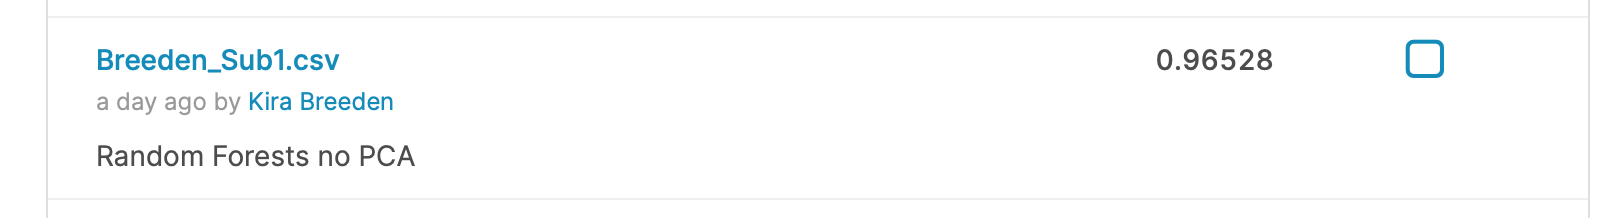

# 2.  
__Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables.__ 

__Record the time it takes to identify the principal components.__


In [13]:
from sklearn.decomposition import PCA

In [14]:
X = np.array(df_train.drop(['label'], 1))
y = np.array(df_train['label'])

In [15]:
pca = PCA(n_components=0.95) 
start=datetime.now()
#fitting our PCA to our combined train and test X set (red flag alert!)
pca.fit(X)
X_reduced = pca.transform(X)
end=datetime.now()
print("Running time: ", end-start)

Running time:  0:00:03.058817


In [16]:
print("Original shape: {}".format(str(X.shape))) 
print("Reduced shape: {}".format(str(X_reduced.shape)))

print("PCA component shape: {}".format(pca.components_.shape))

Original shape: (42000, 784)
Reduced shape: (42000, 154)
PCA component shape: (154, 784)


We can see that using PCA our principal components have been reduced from the 784 explanatory variables to 283 pricipal components. 

# 3. 
__Using the identified principal components from step (2), use the train.csv to build another random forest classifier.__

__Record the time it takes to fit the model and to evaluate the model on the test.csv data by submitting to Kaggle.com.__ 

__Provide your Kaggle.com score and user ID.__


In [17]:
rnd_forest_pca = RandomForestClassifier(n_estimators=50, max_depth = 200, n_jobs=-1, bootstrap = True, max_features = 'sqrt', random_state=123)
start=datetime.now()
rnd_forest_pca.fit(X_reduced, y)
end=datetime.now()
print("Running time: ", end-start)

Running time:  0:00:06.781824


In [18]:
print("The only metrics we can look at without a test set is the accuracy of our model on the data that it trained over...")
print('Accuracy: ', rnd_forest_pca.score(X_reduced,y), ' on our training data.')

The only metrics we can look at without a test set is the accuracy of our model on the data that it trained over...
Accuracy:  1.0  on our training data.


In [19]:
X_predict = np.array(pca.transform(df_test))

In [20]:
forecast_set = rnd_forest_pca.predict(X_predict)
submission_id = np.array(df_test.index.values)
submission_id = submission_id + 1
submission_set = np.column_stack((submission_id,forecast_set))
#np.savetxt('Breeden_Sub2.csv', submission_set, delimiter=',', fmt='%d')

You can see from the screenshot below that our submission for this PCA transformed data actually performs slightly worse than our previous random forests model. Other than the performance difference, we have a major design flaw that we need to fix and we will discuss in number 5. 

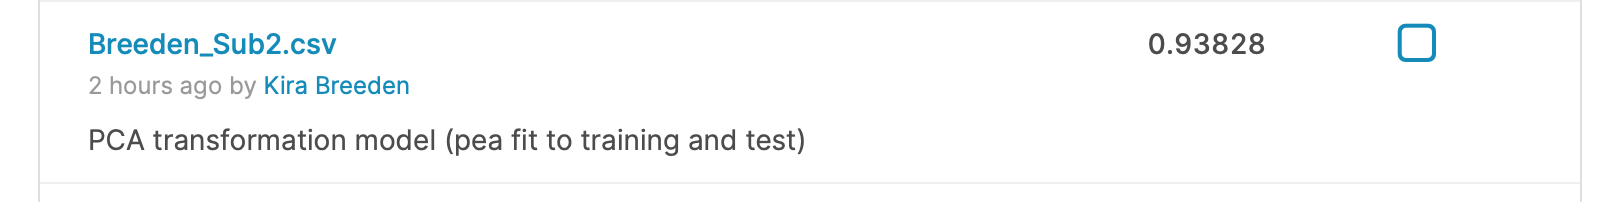

# 4. 
__Submit both the RF Classifier and the PCA RF Classifier to Kaggle.com, and report both scores along with your user name.__  

__Provide your Kaggle.com score and user ID.__


My kaggle user ID is kirabreeden and below are my kaggle scores for the RF Classifier and the PCA RF Classifier. 

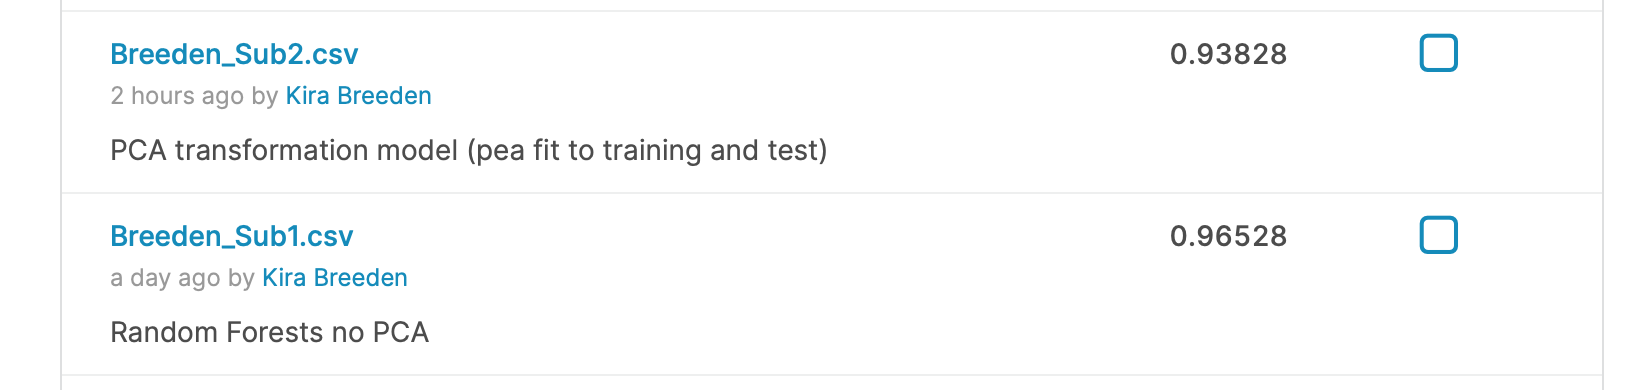

# 5. 
__The experiment we have proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com.__ 

__Provide your Kaggle.com score and user ID.__

So as we hinted at before, there is a major design flaw in this experiment. Basically it boils down to the separation of test and training data. When we were previously asked to execute our PCA on our data, we were told to execute the PCA on the entire dataset (training and testing sets combined), however when it comes to PCA, we want to separate our training and testing data, then apply PCA and fit the PCA ONLY TO the training set. After it is fitted to the training set, we transform the training and testing sets with the pca method (again, that has only been fitted to the training data). 

This separation of training and testing data for PCA follows the same reasoning as the separation of training and testing set for all other machine learning methods. Basically, if our model learns from the test set, we are more likely to overfit and to create a model that will perform more poorly in the real world. Not only this, but in the training of our model, without a test set, we have no way of evaluating the performance of our model before unleashing it on the world. We would definitely not want to use a model that has not been tested to make predictions especially if those predictions cause larger decisions involving humans (like in the medical field). 

So...let's fix this problem.

In [21]:
#first we separate train and test data...
X = np.array(df_train.drop(['label'], 1))
y = np.array(df_train['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [22]:
#next we apply PCA (fitting only to the training data and transforming both from that fitting)
pcaF = PCA(n_components=0.95) 
start=datetime.now()
pcaF.fit(X_train)
X_train_reduced = pcaF.transform(X_train)
X_test_reduced = pcaF.transform(X_test)
end=datetime.now()
print("Running time: ", end-start)


Running time:  0:00:02.706662


In [23]:
print("Original shape: {}".format(str(X_train.shape))) 
print("Reduced shape: {}".format(str(X_train_reduced.shape)))

print("PCA component shape: {}".format(pcaF.components_.shape))

Original shape: (33600, 784)
Reduced shape: (33600, 153)
PCA component shape: (153, 784)


In [24]:
rnd_forest_pca_fixed = RandomForestClassifier(n_estimators=50, max_depth = 200, n_jobs=-1, bootstrap = True, max_features = 'sqrt', random_state=123)
start=datetime.now()
rnd_forest_pca_fixed.fit(X_train_reduced, y_train)
end=datetime.now()
print("Running time: ", end-start)

Running time:  0:00:05.250445


In [25]:
print("Ahh, now we can look at our metrics...")
y_pred = rnd_forest_pca_fixed.predict(X_test_reduced)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy: ', rnd_forest_pca_fixed.score(X_train_reduced,y_train), ' on our training data.')
print('Accuracy: ', rnd_forest_pca_fixed.score(X_test_reduced,y_test), ' on our test data.')

Ahh, now we can look at our metrics...
Root mean squared error =  1.0635184194791496
Accuracy:  1.0  on our training data.
Accuracy:  0.9339285714285714  on our test data.


In [26]:
df_test_reduced = pcaF.transform(df_test)
print("Original shape: {}".format(str(df_test.shape))) 
print("Reduced shape: {}".format(str(df_test_reduced.shape)))

print("PCA component shape: {}".format(pcaF.components_.shape))

X_predict = np.array(df_test_reduced)


Original shape: (28000, 784)
Reduced shape: (28000, 153)
PCA component shape: (153, 784)


In [27]:
forecast_set = rnd_forest_pca_fixed.predict(X_predict)
submission_id = np.array(df_test.index.values)
submission_id = submission_id + 1
submission_set = np.column_stack((submission_id,forecast_set))
#np.savetxt('Breeden_Sub3.csv', submission_set, delimiter=',', fmt='%d')

So as you can see below, our performance does not change too much (in this case) between this method and the previous faulty method of using PCA but our ability to analyze and take a look at what our models are doing increases dramatically and we have the opportunity to tune our model much easier because we can actually evaluate performance on our test set. 

As mentioned before, my kaggle user ID is kirabreeden. 

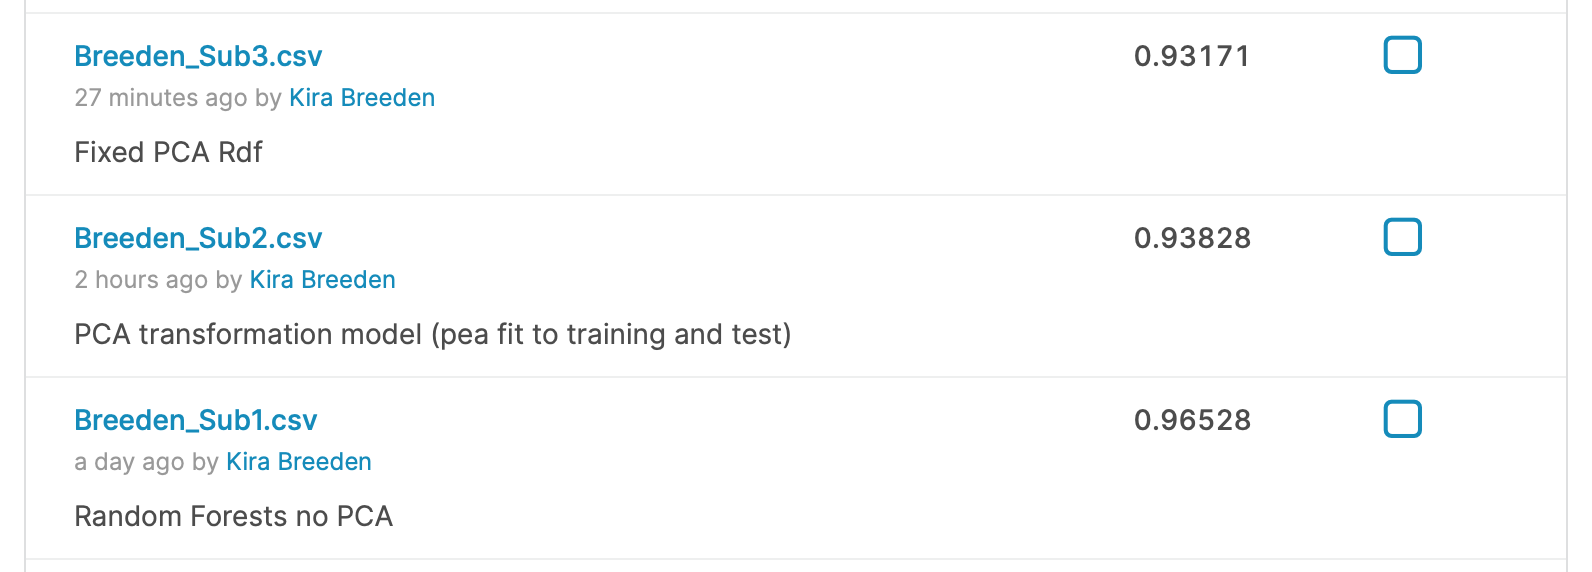

# Management Problem

__From a management perspective, the predictive accuracy of models must be weighed against the costs of model development and implementation. Suppose you were the manager of a data science team responsible for implementing models for computer vision (classification of images analogous to the MINST problem). Would you recommend using PCA as a preliminary to machine learning classification? Explain your thinking.__

Well, I would say it depends on the size of the images and the desired accuracy of the model. As we can see above, in general, when we apply PCA to our data, it will improve the run time of our model (because we are working with less data) but it will also lower the accuracy. Although it may not be as important in this dataset because the images are not so giant, I would say that in general, if you are working with large data, I would recommend using PCA. In general, the accuracy should not drop too much and it can really help keep run time down. 

If however, you are working with very important data, like healthcare data, and you wish to keep the accuracy of your model as high as possible, then I would reevaluate and see if you have the computing power to deal with large data without applying PCA and if you do, then I would suggest leaving PCA out.  